In [1]:
import requests
request=requests.get("https://www.gutenberg.org/files/1661/1661-0.txt")
request.status_code

200

In [2]:
with open("book.txt", "wb") as file:
    file.write(request.content)


In [3]:
#read the file in text string
text = open('book.txt', 'r', encoding='utf-8').read()
text = text.lower()
sentences = text.split('\n')

In [4]:
#create list of sentences
sentences = text.split('\n')

In [3]:
#import dependencies to preprocess the text data and making sequences
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [6]:
#initialize the tokenizer, which can work char by char
tokenizer = Tokenizer(oov_token='<UNK>')


In [7]:
tokenizer.fit_on_texts(sentences)
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

8923

In [9]:
sequences=tokenizer.texts_to_sequences(sentences)


In [10]:
input_sequences = []
for sequence in sequences:
  for i in range(1, len(sequence)):
    n_gram_sequence = sequence[:i+1]
    input_sequences.append(n_gram_sequence)

In [11]:
print(input_sequences[0], input_sequences[1], input_sequences[2], input_sequences[3])

[4776, 158] [4776, 158, 331] [4776, 158, 331, 886] [4776, 158, 331, 886, 5]


In [12]:
#find the maximum length among sequences
max_seq_len = max([len(seq) for seq in input_sequences])
max_seq_len

20

In [13]:
#pad the sequences to ensure that they are all of same length
padded_sequences = pad_sequences(input_sequences, maxlen = max_seq_len)

In [14]:
print(padded_sequences[0], padded_sequences[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 4776  158] [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 4776  158  331]


In [15]:
import numpy as np
padded_sequences = np.array(padded_sequences)


In [16]:
#prepare training sequences and labels
x = padded_sequences[:, : -1]
labels = padded_sequences[:, -1]


In [17]:
labels

array([ 158,  331,  886, ...,   84,  360, 1674], dtype=int32)

In [18]:
#to one hot encode the labels
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [19]:
x.shape

(101523, 19)

In [20]:
y.shape

(101523, 8923)

In [21]:
#import dependencies for defining the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(vocab_size, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='acc', min_delta=0.01 , patience=3)
model.fit(x, y, epochs=50, verbose=1,batch_size=512, callbacks=[es])

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - acc: 0.0642 - loss: 6.6774
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - acc: 0.1414 - loss: 5.3243
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - acc: 0.1773 - loss: 4.6742
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - acc: 0.2145 - loss: 4.0552
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - acc: 0.2724 - loss: 3.5188
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.3357 - loss: 3.0546
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - acc: 0.3941 - loss: 2.6845
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - acc: 0.4457 - loss: 2.3959
Epoch 9/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - acc: 0.4887 - loss: 2.1670
Epoch 10/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.5271 - loss: 1.9690
Epoch 11/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.5624 - loss: 1.8103
Epoch 12/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - acc: 0.5795 - loss: 1.7058
Epoch 13

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 19, 100)             │         892,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 512)                 │         731,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8923)                │       4,577,499 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,602,807 (70.96 MB)

 Trainable params: 6,200,935 (23.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,401,872 (47.31 MB)

In [25]:
model.save("mymodel.keras")

In [1]:
from tensorflow.keras.models import load_model
# load model
savedModel=load_model('mymodel.keras')

In [7]:

with open('tokenizer.pkl', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

In [11]:
#Time to become storyteller!
seed_text = "I had seen little of Holmes lately. My marriage had drifted us away from each other"
next_words = 100

for _ in range(next_words):
    sequence = loaded_tokenizer.texts_to_sequences([seed_text])
    padded = pad_sequences(sequence, maxlen=max_seq_len-1)
    predicted = savedModel.predict(padded, verbose=0)
    predicted_class = predicted.argmax(axis=-1)
    output_word = ''
    for word, index in loaded_tokenizer.word_index.items():
        if index == predicted_class:
            output_word = word
            break
    seed_text += ' ' + output_word
print(seed_text)


I had seen little of Holmes lately. My marriage had drifted us away from each other in the other poor rabbits when i received even more away in my ignorance of the crackling fire from which terminated upon the body until his father’s eyes editions are coiners on bohemian large eyes due to me on the terms of perfect equality as recorded by an eye behind him bankers’ safes had ceased to believe i had no interesting until after father’s a rule mr wilson has got from the state of loans metal to assure us bankers’ safes had been woven round the metropolis when we fell in safety then clothes dimly about four large turner and


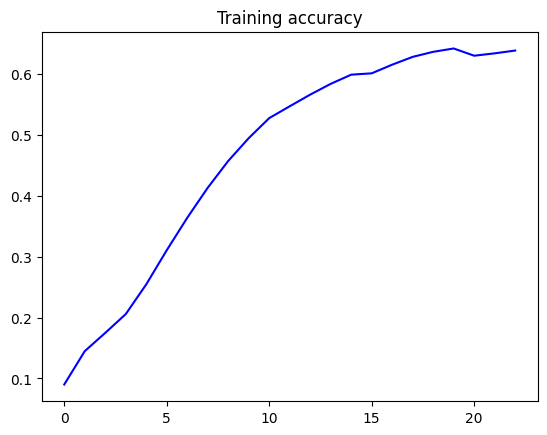

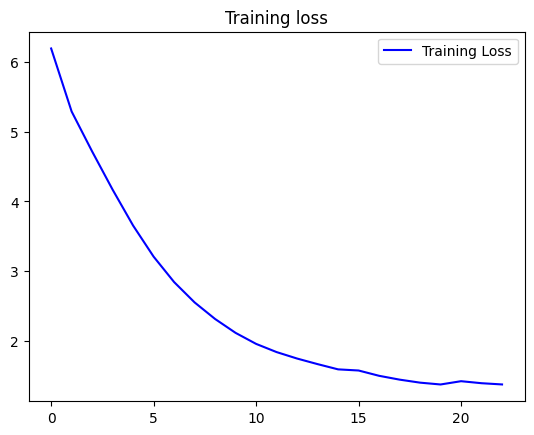

In [29]:
import matplotlib.pyplot as plt
history = model.history
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()